In [30]:
import sys
print(sys.executable)

c:\Users\adhik\OneDrive\Desktop\job_recommendation_system\venv\Scripts\python.exe


In [31]:
import pandas as pd

df_raw = pd.read_csv("../data/indeed-job-listings-information.csv")
print(df_raw.shape)
df_raw.head()


(1000, 16384)


,jobid,company_name,date_posted_parsed,job_title,description_text,benefits,job_type,location,salary_formatted,company_rating,...,Column16355,Column16356,Column16357,Column16358,Column16359,Column16360,Column16361,Column16362,Column16363,Column16364
0,d46480488e3aa20c,FitLab INC,"""2024-08-04T14:55:36.532Z""",FitLab Email Marketing Manager,Description: \n Who Is FitLab: FitLab is a p...,"[""401(k)"",""Dental insurance"",""Disability insur...",Full-time,California,"$90,000 - $105,000 a year",4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ba9bf4e04cfd9cdb,Buccal Up Dental,"""2024-08-04T12:29:09.402Z""",Customer Service Representative - Work From Home,The Customer Associate is the first point of c...,"[""401(k) matching"",""Continuing education credi...",Permanent,"Sugar Land, TX 77479",$28 - $50 an hour,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9e4031d06dd42d32,Peraton,"""2024-08-01T19:30:03.000Z""",Information Technology Support Specialist,About Peraton Peraton is a next-generation na...,"[""Dental insurance"",""Disability insurance"",""He...",Full-time,United States,"$66,000 - $106,000 a year",3.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,46554b6bae3dfc9f,Samu social de Paris,"""2022-04-27T20:55:01.000Z""",Opérateur.trice de réservation hotelière (de j...,"Dans ce cadre, vous êtes amené/e à réaliser le...","[""Prise en charge du transport quotidien"",""RTT""]",CDD,75012 Paris,"1 964,03 € par mois",3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06e52e564455d499,Terideal,"""2024-08-14T19:05:19.000Z""",Chauffeur Opérateur Curage H/F,Informations générales ...,"[""Intéressement et participation""]","CDI, Temps plein",Wissous (91),De 24 000 € à 28 000 € par an,2.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Dropping empty columns

df = df_raw.dropna(axis=1, how="all").copy()

print("Before cleaning:", df_raw.shape)
print("After dropping all-null columns:", df.shape)


Before cleaning: (1000, 16384)
After dropping all-null columns: (1000, 20)


In [33]:
df.columns.tolist()


['jobid',
 'company_name',
 'date_posted_parsed',
 'job_title',
 'description_text',
 'benefits',
 'job_type',
 'location',
 'salary_formatted',
 'company_rating',
 'company_reviews_count',
 'country',
 'date_posted',
 'description',
 'company_link',
 'domain',
 'apply_link',
 'url',
 'is_expired',
 'timestamp']

In [34]:
selected_cols = [
    "jobid",
    "job_title",
    "description_text",
    "benefits",
    "job_type",
    "location",
    "salary_formatted",
    "company_name",
    "company_rating",
    "company_reviews_count",
    "country",
    "url",
    "apply_link"
]

selected_cols = [c for c in selected_cols if c in df.columns]
df = df[selected_cols].copy()

print("After column selection:", df.shape)
df.head()


After column selection: (1000, 13)


,jobid,job_title,description_text,benefits,job_type,location,salary_formatted,company_name,company_rating,company_reviews_count,country,url,apply_link
0,d46480488e3aa20c,FitLab Email Marketing Manager,Description: \n Who Is FitLab: FitLab is a p...,"[""401(k)"",""Dental insurance"",""Disability insur...",Full-time,California,"$90,000 - $105,000 a year",FitLab INC,4.5,4,US,https://www.indeed.com/viewjob?jk=d46480488e3a...,https://www.indeed.com/viewjob?jk=d46480488e3a...
1,ba9bf4e04cfd9cdb,Customer Service Representative - Work From Home,The Customer Associate is the first point of c...,"[""401(k) matching"",""Continuing education credi...",Permanent,"Sugar Land, TX 77479",$28 - $50 an hour,Buccal Up Dental,5.0,4,US,https://www.indeed.com/viewjob?jk=ba9bf4e04cfd...,https://www.indeed.com/viewjob?jk=ba9bf4e04cfd...
2,9e4031d06dd42d32,Information Technology Support Specialist,About Peraton Peraton is a next-generation na...,"[""Dental insurance"",""Disability insurance"",""He...",Full-time,United States,"$66,000 - $106,000 a year",Peraton,3.1,297,US,https://www.indeed.com/viewjob?jk=9e4031d06dd4...,https://www.indeed.com/viewjob?jk=9e4031d06dd4...
3,46554b6bae3dfc9f,Opérateur.trice de réservation hotelière (de j...,"Dans ce cadre, vous êtes amené/e à réaliser le...","[""Prise en charge du transport quotidien"",""RTT""]",CDD,75012 Paris,"1 964,03 € par mois",Samu social de Paris,3.6,15,FR,https://fr.indeed.com/viewjob?jk=46554b6bae3dfc9f,https://fr.indeed.com/viewjob?jk=46554b6bae3dfc9f
4,06e52e564455d499,Chauffeur Opérateur Curage H/F,Informations générales ...,"[""Intéressement et participation""]","CDI, Temps plein",Wissous (91),De 24 000 € à 28 000 € par an,Terideal,2.6,16,FR,https://fr.indeed.com/viewjob?jk=06e52e564455d499,https://fr.indeed.com/viewjob?jk=06e52e564455d499


In [35]:
text_columns = [
    "job_title",
    "description_text",
    "benefits",
    "job_type",
    "location",
    "salary_formatted",
    "company_name",
    "country"
]

for col in text_columns:
    if col in df.columns:
        df[col] = df[col].fillna("").astype(str)

if "company_rating" in df.columns:
    df["company_rating"] = pd.to_numeric(df["company_rating"], errors="coerce").fillna(0)

df.isna().sum()


jobid                    0
job_title                0
description_text         0
benefits                 0
job_type                 0
location                 0
salary_formatted         0
company_name             0
company_rating           0
company_reviews_count    0
country                  0
url                      0
apply_link               0
dtype: int64

In [36]:
before = len(df)

df["job_title_lc"] = df["job_title"].str.lower().str.strip()
df["company_name_lc"] = df["company_name"].str.lower().str.strip()
df["location_lc"] = df["location"].str.lower().str.strip()

df = df.drop_duplicates(
    subset=["job_title_lc", "company_name_lc", "location_lc"]
)

after = len(df)

print("Duplicates removed:", before - after)
print("Final row count:", after)


Duplicates removed: 14
Final row count: 986


In [37]:
df["job_type"].value_counts().head(10)
df["location"].value_counts().head(10)
(df["salary_formatted"] == "").mean()


np.float64(0.0)

In [39]:
numeric_cols = ["company_rating", "company_reviews_count"]
numeric_cols = [c for c in numeric_cols if c in df.columns]

df[numeric_cols].describe()


,company_rating,company_reviews_count
count,986.000000,986.000000
mean,3.569168,5579.817444
std,0.514996,23753.097487
min,1.000000,2.000000
25%,3.300000,78.000000
50%,3.600000,444.000000
75%,3.900000,2477.000000
max,5.000000,265850.000000


In [40]:
df[numeric_cols].corr()


,company_rating,company_reviews_count
company_rating,1.000000,-0.025349
company_reviews_count,-0.025349,1.000000


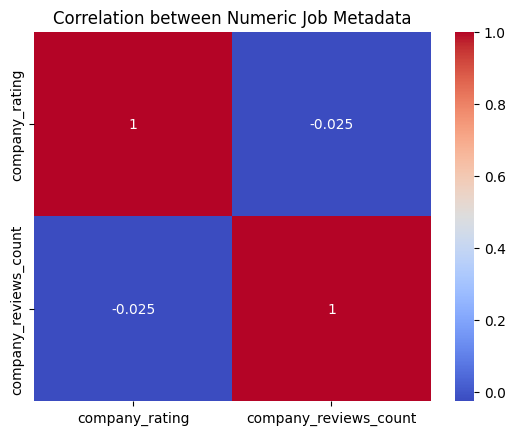

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Numeric Job Metadata")
plt.show()


In [38]:
import os

#Creating models folder
os.makedirs("../backend/models", exist_ok=True)

# Saving clean data
df.to_csv("../backend/models/clean_jobs.csv", index=False)

print("Saved clean_jobs.csv:", df.shape)


Saved clean_jobs.csv: (986, 16)
